## Fetching the data

In [1]:
import numpy as np
import pandas as pd

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

In [14]:
lines = pd.read_csv('out_data.txt').to_numpy()

t = lines[0::4].astype(float)
a_1 = lines[1::4]
a_2 = lines[2::4]
N_particles = lines[3::4].astype(int)

mxv_1 = np.array([x.split(' ') for x in a_1.ravel()],dtype=float)
mxv_2 = np.array([x.split(' ') for x in a_2.ravel()],dtype=float)

#print(t)
#print(mxv_1)
#print(mxv_2)
#print(N_particles)

Now i will reshape mxv_1 and 2 to get the arrays of mass, position and velocity and i will define the two masses as dictionaries.

In [3]:
m_1 = {
    "m": mxv_1[:,0],
    "x": mxv_1[:,1:4][:,0],
    "y": mxv_1[:,1:4][:,1],
    "z": mxv_1[:,1:4][:,2],
    "pos": mxv_1[:,1:4],
    "v_x": mxv_1[:,4:8][:,0],
    "v_y": mxv_1[:,4:8][:,1],
    "v_z": mxv_1[:,4:8][:,2],
    "vel": mxv_1[:,4:8]
}

m_2 = {
    "m": mxv_2[:,0],
    "x": mxv_2[:,1:4][:,0],
    "y": mxv_2[:,1:4][:,1],
    "z": mxv_2[:,1:4][:,2],
    "pos": mxv_2[:,1:4],
    "v_x": mxv_2[:,4:8][:,0],
    "v_y": mxv_2[:,4:8][:,1],
    "v_z": mxv_2[:,4:8][:,2],
    "vel": mxv_2[:,4:8]
}

#print(m_1["z"])

## Results

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

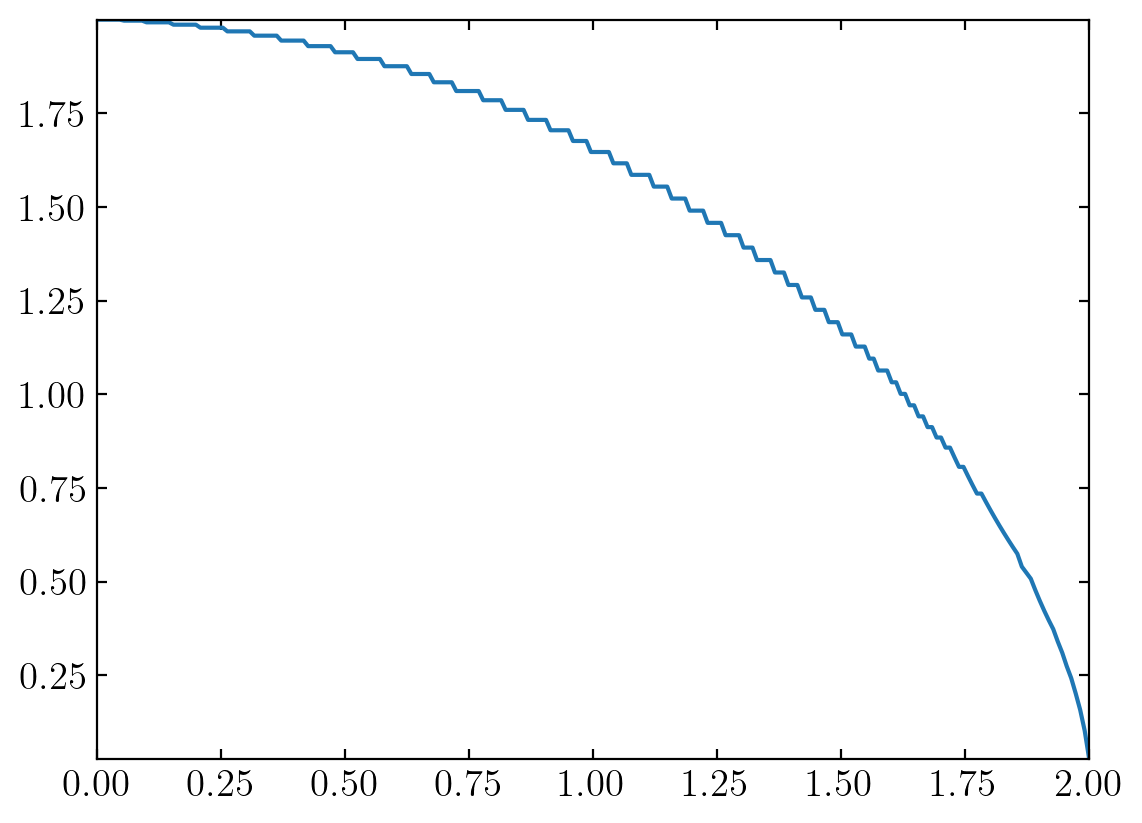

In [5]:
# plotting the distance
def dist(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)

plt.plot(np.linspace(0,2, len(m_1['x'])), dist(m_1['x'], m_1['y'], m_1['z'], m_2['x'], m_2['y'], m_2['z']));

## Trajectories

In [6]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

(-1.0, 1.0)

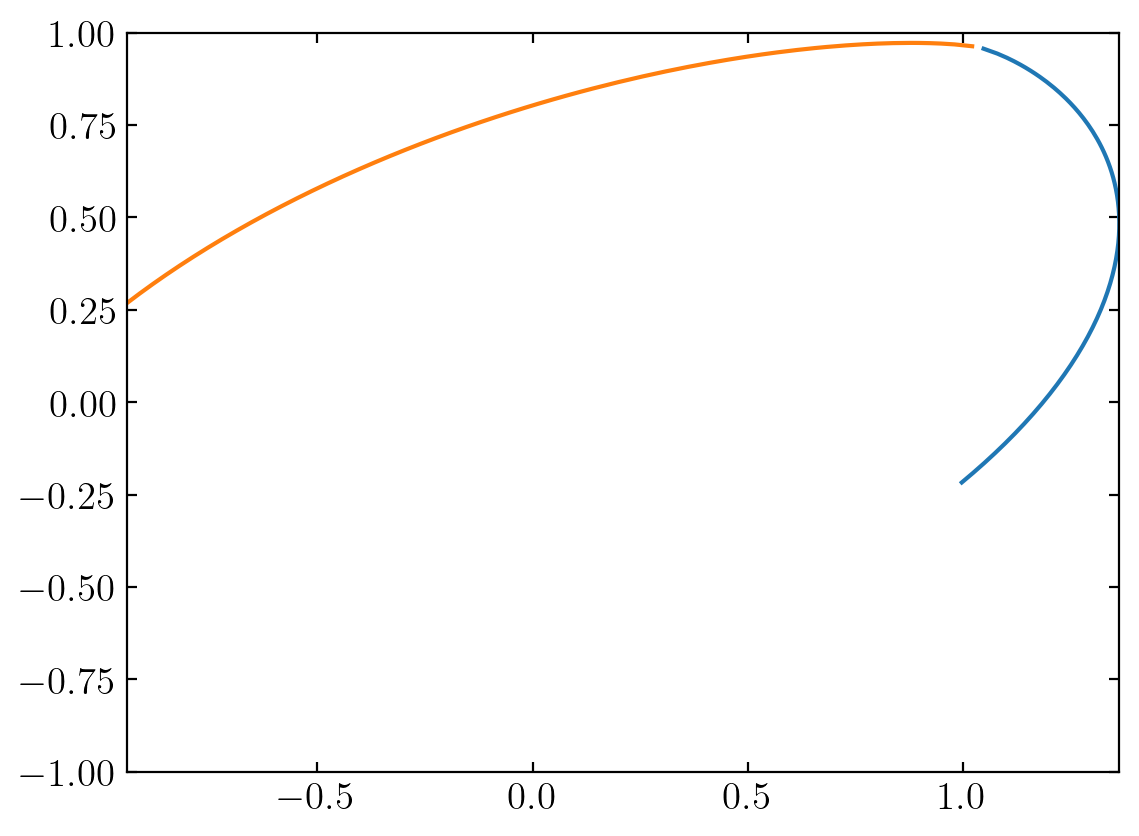

In [18]:
plt.plot(m_1["x"], m_1["y"])
plt.plot(m_2["x"], m_2["y"])
plt.ylim([-1,1])

/tmp/ipykernel_33780/2793063309.py:14: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x[i], y[i])
/tmp/ipykernel_33780/2793063309.py:14: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x[i], y[i])


[-0.2170347  -0.2170347  -0.2170347  -0.2170347  -0.2170347  -0.2170347
 -0.19078066 -0.19078066 -0.19078066 -0.19078066 -0.19078066 -0.16436115
 -0.16436115 -0.16436115 -0.16436115 -0.16436115 -0.16436115 -0.13781249
 -0.13781249 -0.13781249 -0.13781249 -0.13781249 -0.13781249 -0.11117139
 -0.11117139 -0.11117139 -0.11117139 -0.11117139 -0.11117139 -0.08447484
 -0.08447484 -0.08447484 -0.08447484 -0.08447484 -0.08447484 -0.05775984
 -0.05775984 -0.05775984 -0.05775984 -0.05775984 -0.05775984 -0.03106326
 -0.03106326 -0.03106326 -0.03106326 -0.03106326 -0.03106326 -0.00442165
 -0.00442165 -0.00442165 -0.00442165 -0.00442165 -0.00442165  0.02212893
  0.02212893  0.02212893  0.02212893  0.02212893  0.04855309  0.04855309
  0.04855309  0.04855309  0.04855309  0.04855309  0.0748163   0.0748163
  0.0748163   0.0748163   0.0748163   0.0748163   0.10088497  0.10088497
  0.10088497  0.10088497  0.10088497  0.12672669  0.12672669  0.12672669
  0.12672669  0.12672669  0.15231029  0.15231029  0.1

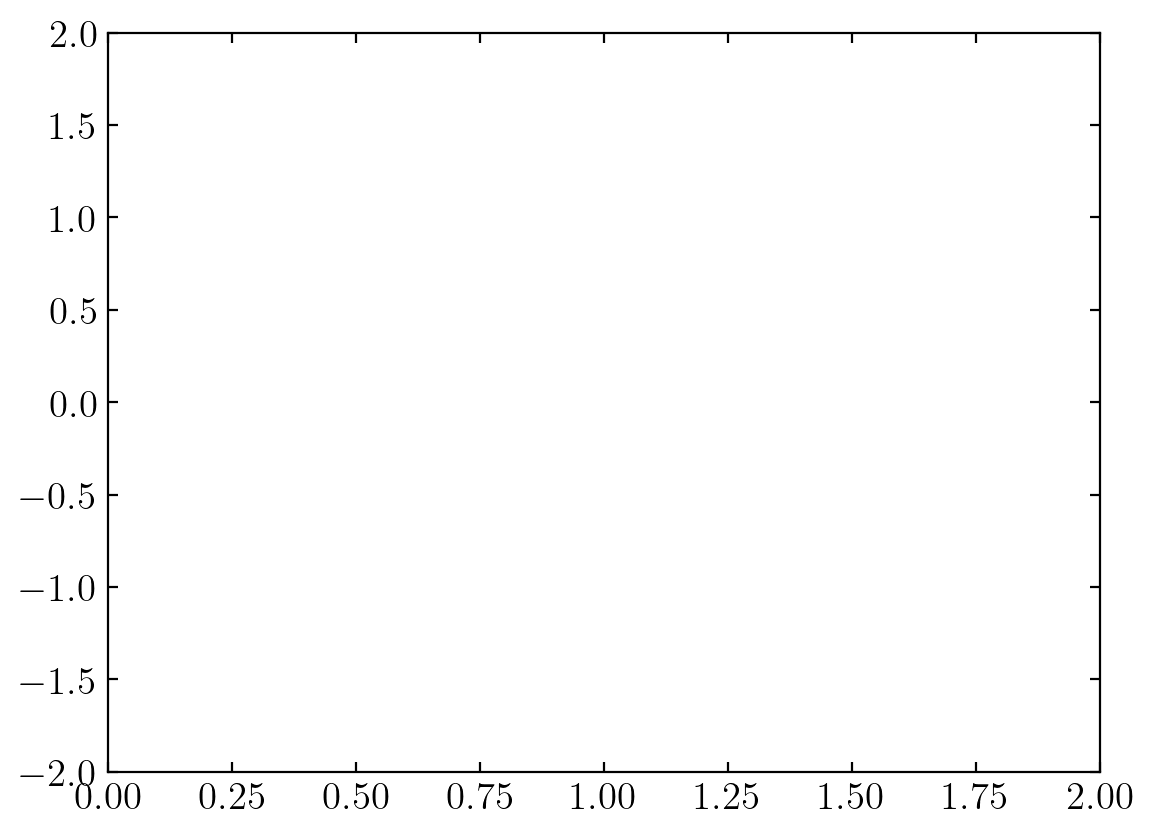

In [22]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=1)

def init():
    line.set_data([], [])
    return line,

print(m_1['y'])

def animate(i):
    x = m_1['x']
    y = m_1['y']
    line.set_data(x[i], y[i])
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

ani.save('animation.gif', writer='imagemagick', fps=60)

plt.show()